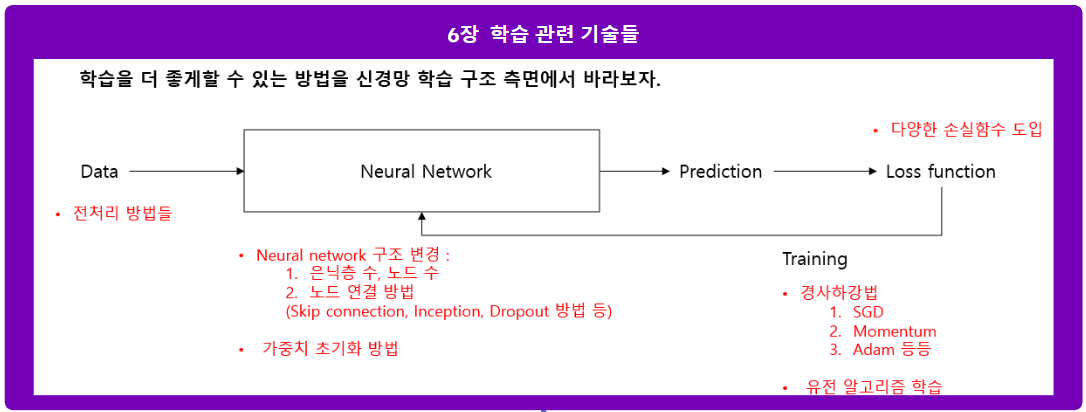


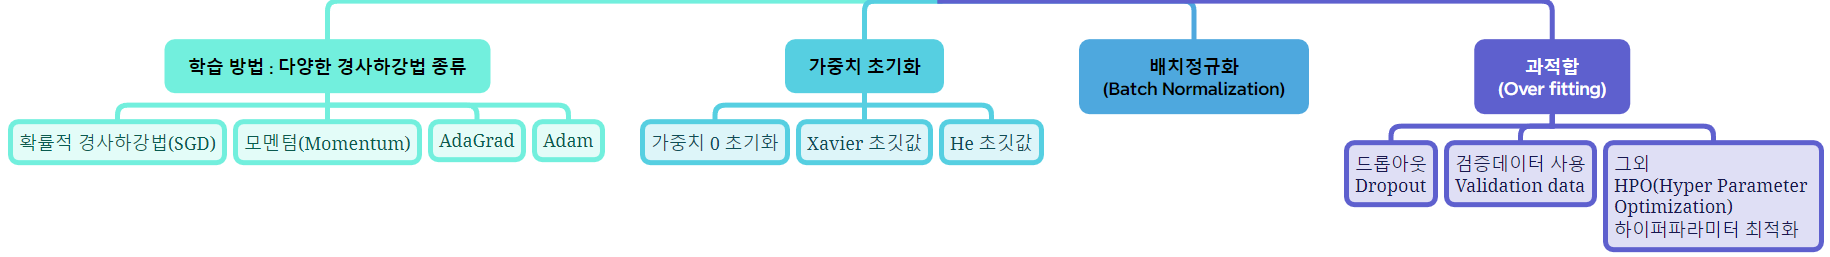

# 
## 6.2. 가중치의 초깃값

- 신경망 구조 중 파라미터인 가중치와 절편을 초기화하는 방법에 대해 소개
1. 신경망의 파라미터를 모두 0으로 초기화하면 무슨 문제가 발생할까?
2. 은닉층의 수를 깊게하는 심층신경망이 초기에 학습하는 데에 실패하였음. 이를 완화하고자 하는 방법 중 제안된 한 가지가 파라미터의 초기화 방법에 대한 연구임

### 6.2.1 초깃값을 모두 0으로 하여 MNIST 문제를 풀어보자.

- 신경망의 가중치를 모두 0으로 초기화하면 어떤 일이 벌어질까?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [3]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10, weight_init_std = 0)

In [4]:
print(network.params)

{'W1': array([[-0.,  0.,  0., ...,  0., -0.,  0.],
       [-0., -0.,  0., ..., -0., -0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0., -0., ...,  0.,  0., -0.],
       [ 0., -0., -0., ..., -0., -0., -0.],
       [ 0., -0.,  0., ..., -0.,  0.,  0.]]), 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'W2': array([[ 0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0.],
       [-0., -0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0.],
       [ 0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0.],
       [-0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0.],
       [-0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.],
       [ 0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.],
       [ 0.,  0., -0., -0.,  0., -0., -0., -0., -0., -0.],
       [

- 데이터 불러오기

In [5]:
def one_hot_encode(t, num_classes):
    num_samples = t.shape[0]
    one_hot_labels = np.zeros((num_samples, num_classes))
    one_hot_labels[np.arange(num_samples), t] = 1
    return one_hot_labels

# coding: utf-8
import sys, os
sys.path.append(os.pardir)

#from two_layer_net import TwoLayerNet
from common import *
from tensorflow.keras.datasets import mnist


(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
t_train = one_hot_encode(t=t_train, num_classes=10)
t_test = one_hot_encode(t=t_test, num_classes=10)

print(np.shape(x_train))
print(np.shape(t_train))
print(np.shape(x_test))
print(np.shape(t_test))

x_train = x_train / 255
x_test = x_test/ 255

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [6]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

print("신경망 학습시작 ")
print("=======================================================")
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

신경망 학습시작 
0.0993 0.1032
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135


- 학습이 제대로 이루어지지 않은 것을 볼 수 있음
- 좀 더 자세히 보기 위해 첫 학습 때 grad 기울기를 출력해보자.

In [7]:
import sys
count = 0
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

print("신경망 학습시작 ")
print("=======================================================")
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    print("{}th itertion에서 손실함수 계산 후 편미분한 grad 값 :".format(i))
    print(grad)
    if count >= 0: 
        break
    count += 1
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

신경망 학습시작 
0th itertion에서 손실함수 계산 후 편미분한 grad 값 :
{'W1': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'W2': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.

- 앞쪽 기울기들이 모두 0인 것을 볼 수 있음
- 이는 파라미터 업데이트가 진행되지 않는다는 의미임

In [8]:
data = np.reshape(x_train[0], (-1, 784))
prediction = network.predict(data)
print(prediction)

[[-0.00520176  0.13672802 -0.00630439  0.03838573 -0.00786065 -0.10748725
  -0.02410038  0.06801502 -0.05967196 -0.03250237]]


In [9]:
t = np.reshape(t_train[0], (-1,10))
loss = network.loss(data, t)
print(loss)

2.412178644584463


- 맨 끝 b2 절편 파라미터는 softmax with loss에 의해 (y-t) * 1 로 미분 전파됨.
- 그러므로 0이 아님
- 나머지는 0이 곱해져서 미분 값이 모두 0임

- 또한 가중치의 대칭적인 구조가 중요하다고 표현되는데 이에 대한 자세한 사항은 Rumelhurt의 error backpropagation 논문 참고 

# 
## 신경망의 은닉층을 더 깊게, 심층신경망의 학습 어려움 발생
- 최초의 신경망의 연구는 은닉층이 1개인 단층 신경망을 주로 연구하였음.
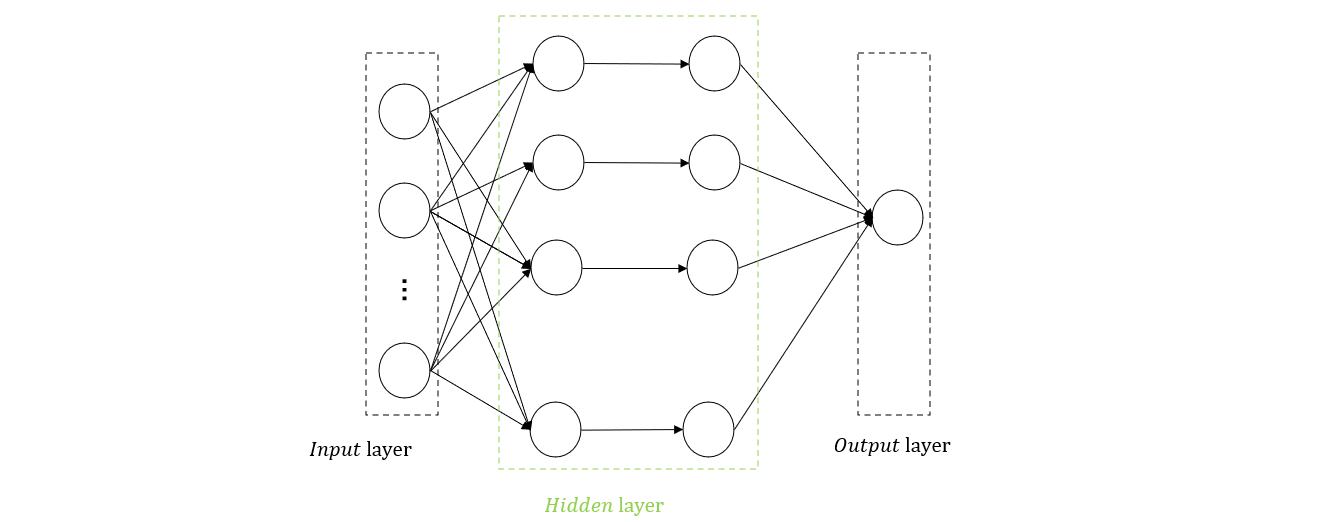
- 1989년 Cybenko[1] 는 위 신경망 그림과 같이 은닉층이 적어도 하나 이상 있고 충분한 노드 수를 가지는, 그리고 유계(bounded)이면서 연속인 함수(예를 들어 시그모이드)를 활성함수로 사용할 경우 임의의 연속인 함수를 근사화할 수 있음을 증명하였음(Universial Approximation Theroem).
- 하지만 구체적으로 충분한 노드 수에 대해서 모르며 실제로 실현 불가능한 노드 수를 가지는 경우가 존재할 수 있음.
- 이런 이유로 은닉층의 수를 증가시켰고, 경험적으로 더 깊은 은닉층을 사용하면 원하는 함수를 표현하는데 필요한 노드 개수를 줄이고 일반화 오창의 양도 줄어들 수 있다고 실험적으로 알려져있음[2].
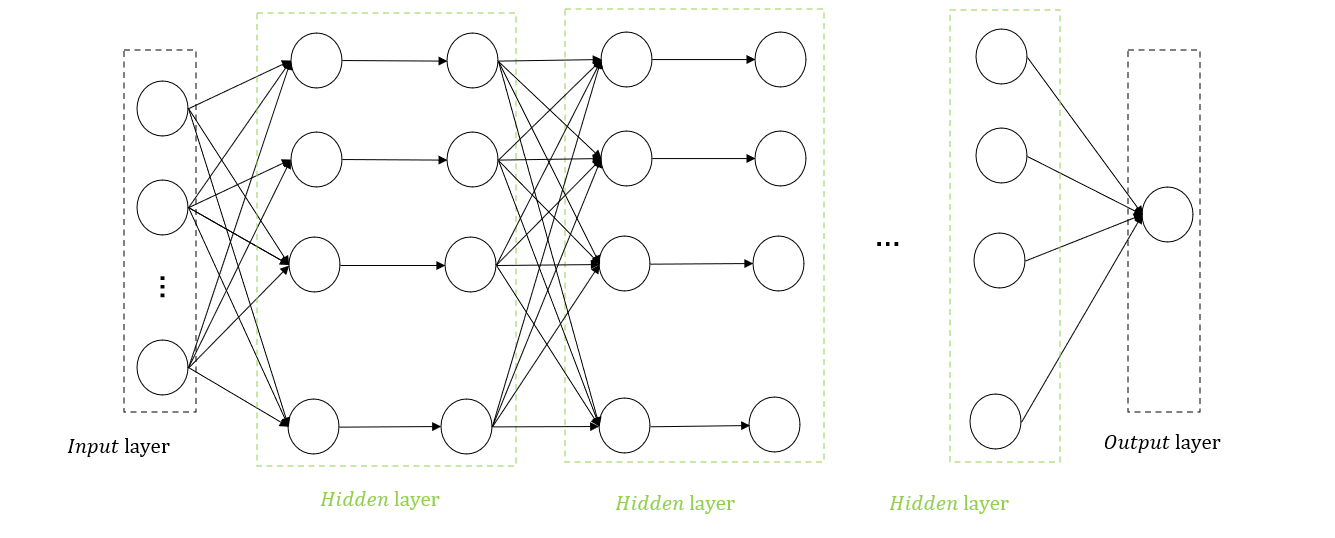

참고문헌
- [1] G. Cybenko, “Approximation by superpositions of a sigmoidal function”, Math, Control Signals Systems, Vol. 2, pp.303-314, 1989.
- [2] Y. Bengio, I. Goodfellow and A. Courville, “Deep learning”, MIT Press, 2017.

#### 심층신경망의 학습 문제 : 은닉층의 수를 늘려서 심층신경망을 구현하여 학습할 때 문제가 발생함.
1. 비선형변환을 포함하는 은닉층 수가 많은 심층신경망의 손실함수를 최적화하는 문제는 비볼록 최적화(Non-convex optimization) 문제임.
- 이는 경사하강법을 사용하여 미분계수가 0인 점을 찾는 경우, 참아진 점이 전역최솟값(Global minimum)을 보장하지 못하고 극솟값(Local minimum), 극댓값(Local maximum), 안장점(Saddle point) 중 한 가지 경우를 찾게됨.
- 또한 은닉층 수가 많은 심층신경망의 손실함수 형태는 복잡함이 알려져 있음[3].
- 아래 그림은 은닉층 수가 10개이고 각 노드 수가 2개씩, 그리고 파라메트릭 시그모이드 활성함수[4]를 사용한 경우에 대한 XOR 문제를 학습한 심층신경망에 대한 그림임.
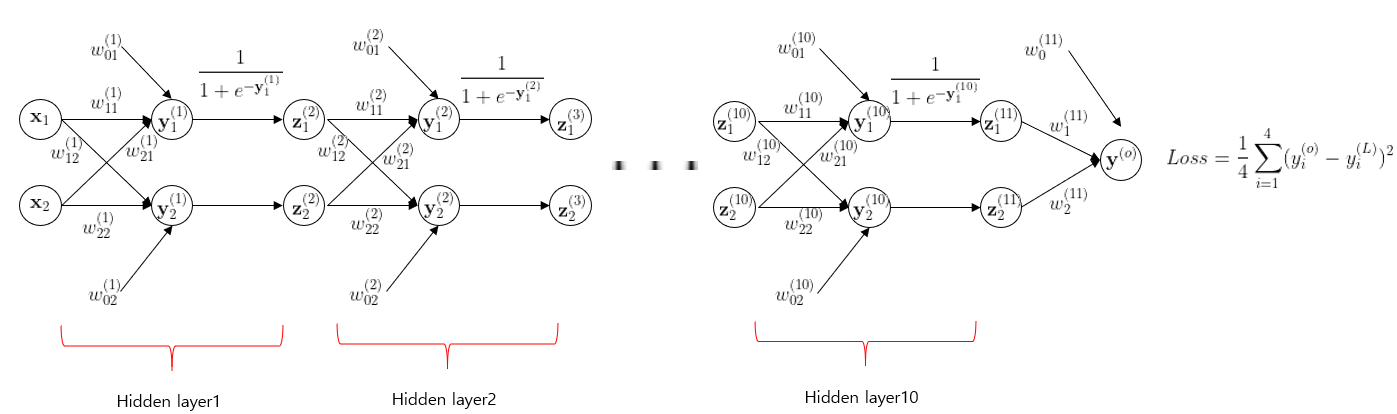
- 은닉층 수가 10개인 심층신경망의 파라미터에 대한 손실함수를 그래프를 표현할 수 없어(파라미터 수가 많으므로), 첫 번째 선형변환 파라미터 중 2개에 대한 손실함수 값을 그린 그래프임.
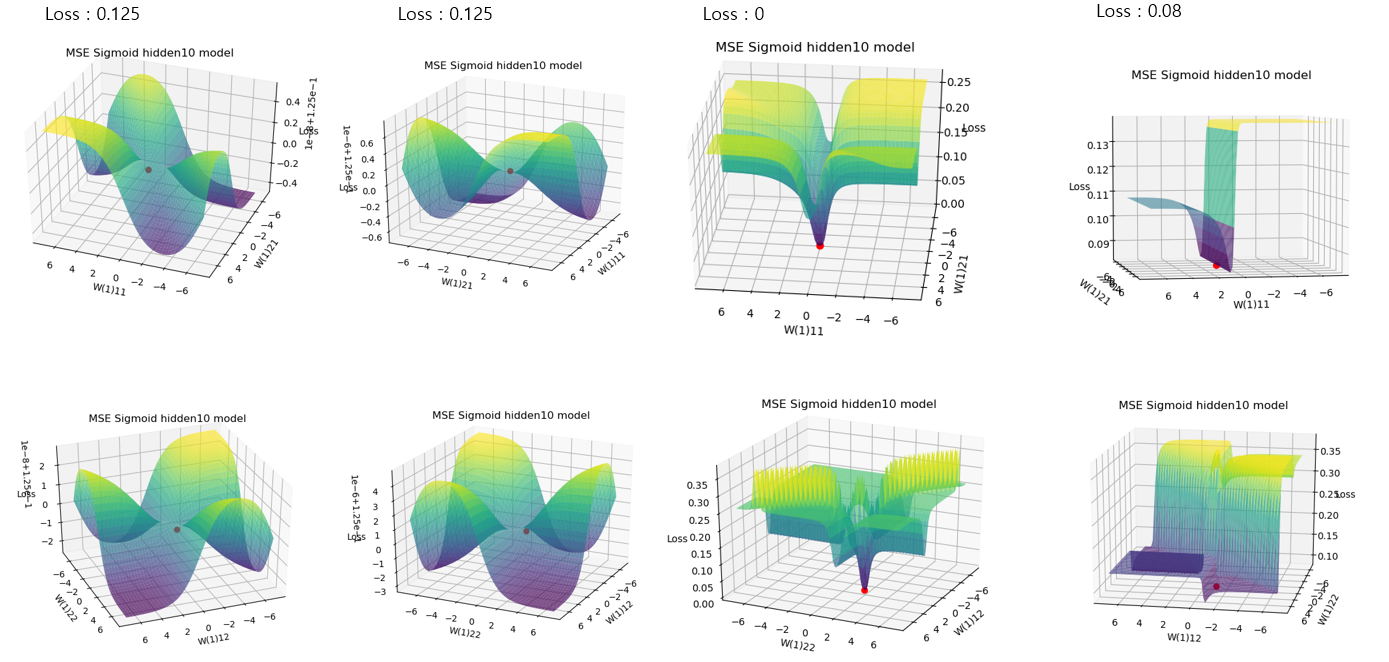
- 위 처럼 은닉층 수가 깊은 심층신경망을 학습하는 경우 찾아진 점이 항상 낮은 손실값을 가지지 않는 것을 볼 수 있음(또한 안장점에 수렴한 것도 볼 수 있음)

2. 또 다른 문제로 오차역전파로 전달되는 기울기의 크기가 매우 작아져 실질적으로 학습이 이루어지지 않는 "기울기 소실 문제" Gradient vanishing problem이 발생함.

참고문헌
- [3] H. Li, Z. Xu, G. Taylor, C. Studer and T. Goldstein, “Visualizing  the loss landscape of neural nets”, arXiv:1712.09913, 2018.
- [4] 고영민, and 고선우. "파라메트릭 활성함수를 이용한 기울기 소실 문제의 완화." 정보처리학회논문지/소프트웨어 및 데이터 공학 제 10.10 (2021): 10.

### 6.2.2. 은닉층의 활성화값 분포

- Sigmoid 활성함수를 사용할 때 신경망 가중치 초기화 논문 : Xavier 초기화
- 참고 논문 : Glorot, Xavier, and Yoshua Bengio. "Understanding the difficulty of training deep feedforward neural networks." Proceedings of the thirteenth international conference on artificial intelligence and statistics. JMLR Workshop and Conference Proceedings, 2010.

- 2010년 당시 은닉층을 깊게하면 기울기 소실 문제가 발생하여 심층신경망의 학습에 어려움을 겪고있었음.
- 학습이 잘되기 이전에(local minimum, global minimum) 기울기가 소멸되어 학습 조차 안되는 문제가 발생함(gradient vanishing)
- 이를 완화하기 위한 방법으로 가중치를 초기화하는 방법을 제안함

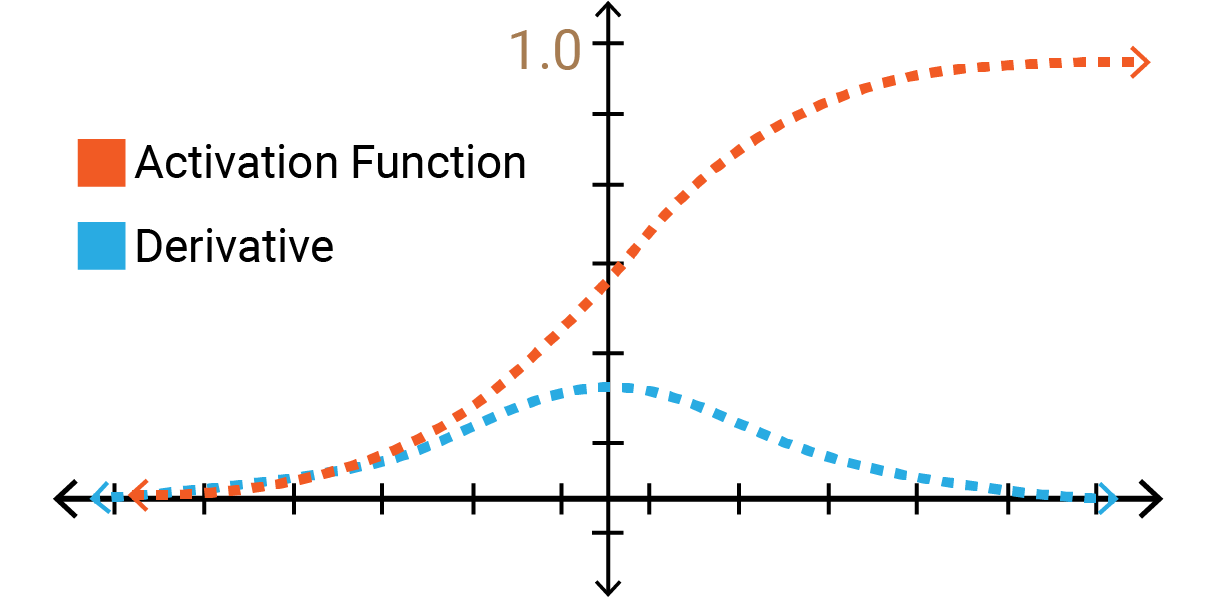

- 가중치를 표준정규분포에서 (1000 X 100)개로 초기화하여
- 시그모이드 함수에 5번 적용한 결과

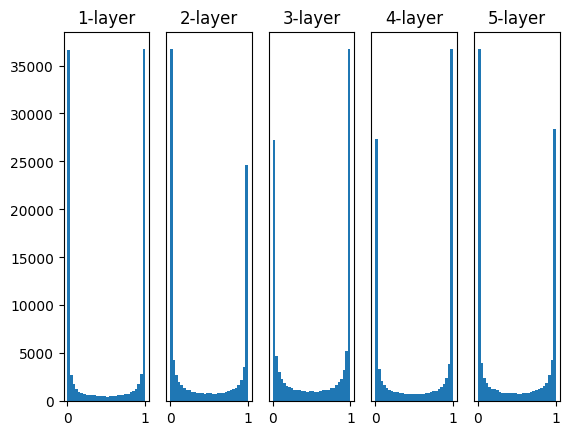

In [10]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 초기화된 가중치가 1-5번 시그모이드 은닉층을 거치는 그림을 보면 0과 1에 빈도가 극단적으로 많은 것을 볼 수 있음
- 0과 1에 몰려있는 경우, 시그모이드의 미분은 전파값이 0.5일 때 0.25값을 가지고 0과 1인 전파값의 경우에 기울기가 거의 0에 가까움

- 가중치를 초기화하는 방법으로 표준정규분포에 0.01을 곱하여 그려보면

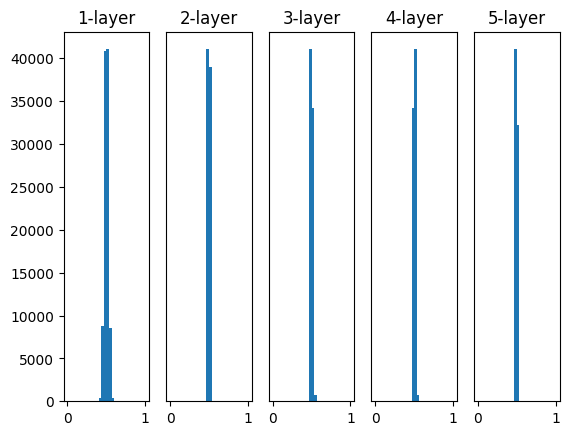

In [11]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 이전보다 0,1에 극단적으로 치우치지 않고 0.5에 있는 것을 볼 수 있음,
- 0.5에 있다는 의미는 시그모이드의 미분이 최대점인 0.25에 분포되어 있다는 의미임

- Xavier 는 시그모이드 함수를 사용할 때 가중치를 초기화하는 방법으로 표준정규분포에 표준편차가 데이터 수에 관련된 것을 추천함
- 이를 그래프로 다시 그려보면

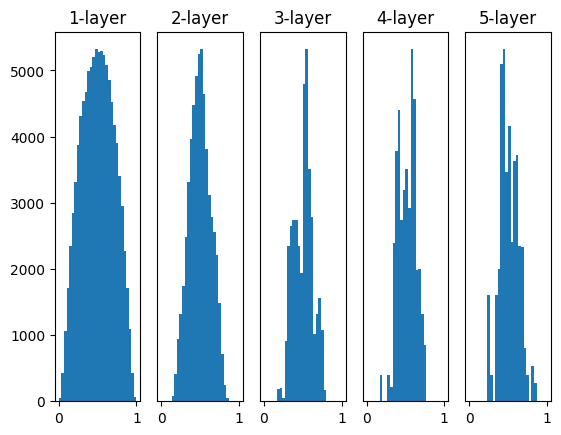

In [12]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 6.2.3. ReLU을 사용할 때의 가중치 초깃값

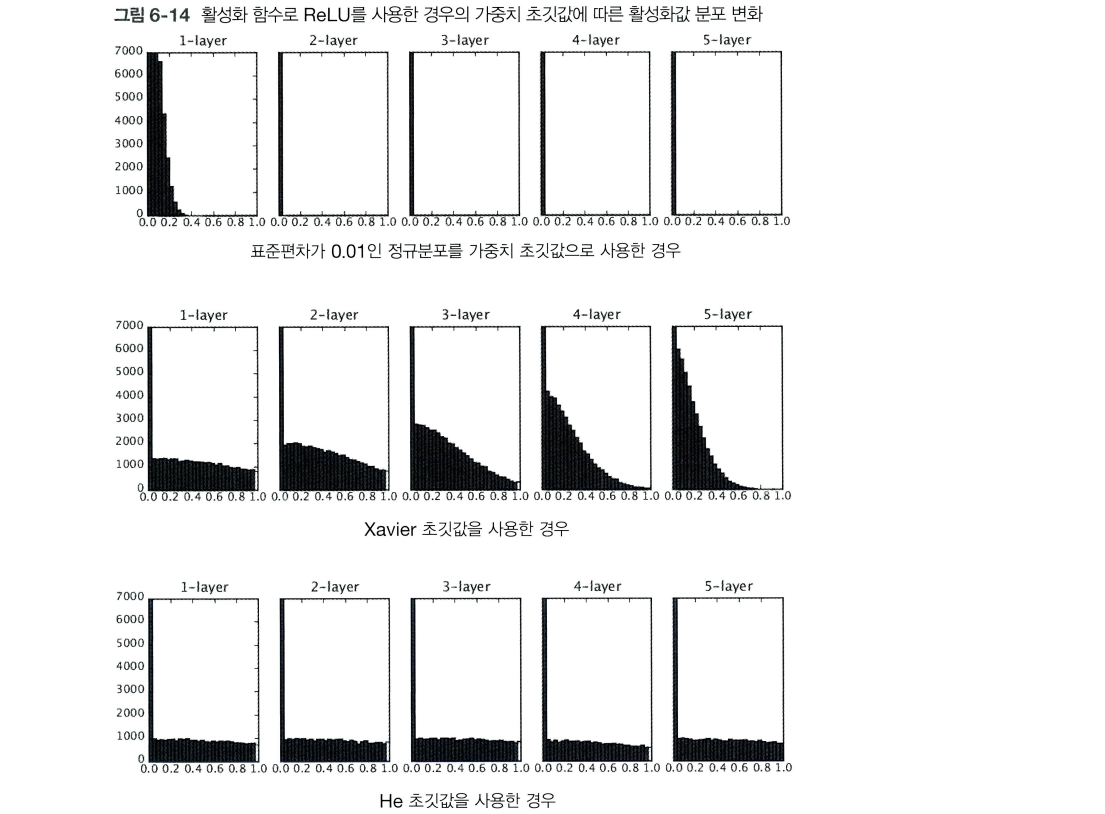

- 마찬가지로 He는 Xavier의 초기화 아이디어를 본따 ReLU 상황에서 데이터를 고르게 퍼뜨려 전달하는 초기화 방법으로
- He initialization 방법을 제안함

#### 질문 :
- 가중치가 골고루 퍼져있다는 의미가 신경망의 손실함수를 잘 감소시킨다는 의미와 관계가 있는가?
- 가중치가 골고루 퍼져있어 기울기가 다양하다면 손실함수를 잘 감소시킨다는 의미와 관계가 있는가?

### 6.2.4. MNIST 데이터셋으로 본 가중치 초깃값 비교

- 아래 실험은 은닉층이 4개(각 노드 100개)인 심층신경망에 대해 가중치 초기화를 다르게 하여 실험한 코드로써
1. Sigmoid 활성함수 / 가중치 초기화 0.01 * 표준정규분포
2. Sigmoid 활성함수 / Xavier 초기화
3. ReLU 활성함수 / He 초기화
- 3가지 실험에 대해 진행함

===========iteration:0===========
std=0.01:2.302538562153406
Xavier:2.299188421201425
He:2.3767866947344203
===========iteration:100===========
std=0.01:2.3022942848251953
Xavier:2.2552159000143064
He:1.3384789931984549
===========iteration:200===========
std=0.01:2.3023323649385334
Xavier:2.142433939710928
He:0.6694034325368214
===========iteration:300===========
std=0.01:2.3034307020513953
Xavier:1.9218236668728472
He:0.3496797702692497
===========iteration:400===========
std=0.01:2.299094408442995
Xavier:1.3864012865808424
He:0.39822237092571755
===========iteration:500===========
std=0.01:2.3052435584295896
Xavier:0.9096061982639507
He:0.30817540524110476
===========iteration:600===========
std=0.01:2.3001113160611526
Xavier:0.670673230431335
He:0.3248650076662459
===========iteration:700===========
std=0.01:2.303122340544413
Xavier:0.605275185767128
He:0.35852416888291516
===========iteration:800===========
std=0.01:2.304390549569379
Xavier:0.4153298451323482
He:0.2183470191420778

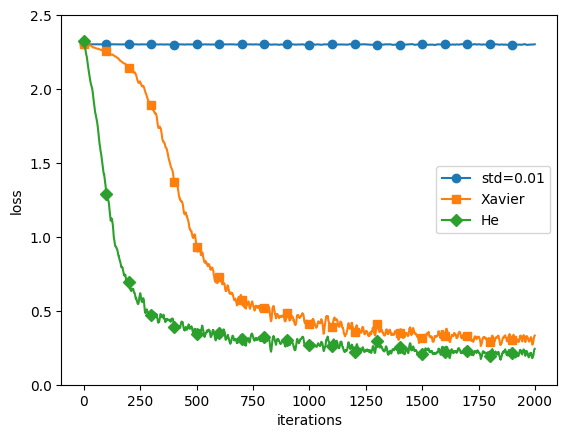

In [13]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

실험결과 :
- 0.01로 사용한 경우는 학습이 이루어지지 않은 문제가 발생하였음.
- Xavier 초기화의 경우 0.01 초기화보다 (같은 시그모이드 활성함수를 사용하였음에도 불구하고) 더 낮은 손실함수 값을 달성하였음.
- 3가지 비교 실험 중 ReLU 함수를 사용하고 He 초기화를 한 경우에 대해 가장 손실함수 값이 빠르게 낮아지고 가장 적은 손실값을 달성함

#### 그 외에 기울기 소실 문제를 해결하기 위해 제안된 연구들
- 벤지오 [5]등은
1. 담금질 기법(Simulated annealing),
2. 멀티 격자 랜덤 탐색(Multi-grid random search),
3. 시간이 가중된 의사 뉴턴 최적화(Time-weighted pseudo-newton optimization),
4. 그리고 이산 오차 전파(Discrete error propagation) 등을 제안
- 호리터 [6]등은
1. 기울기를 사용하지 않는 방법
2. 큰 기울기를 사용하는 방법
3. 다른 연산을 고려하는 방법
4. 특별한 신경망 구조를 생각하는 방법 등 4가지 접근 방법 가능성 제시

- 많이 알려진 방법들로 크게 4가지 분류를 제시할 수 있으며 
1. 파라미터 초기화 전략, 
2. 다양한 경사하강법 알고리즘,
3. LSTM(Long short-term memory)과 GRU(Gated recurrent unit)을 이용한 방법
4. 다양한 파라메트릭 활성함수 방법이 있다.

참고문헌
- [5] Y. Bengio, P. Simard and P. Frasconi, “Learning Long-Term Dependencies with Gradient Descent is Difficult.”, IEEE TRANSACTION ON NEURAL NETWORKS, Vol. 5, No. 2, 1994.
- [6] S. Hochreiter, Y. Bengio, P. Frasconi and J. Schmidhuber, “Gradient flow in recurrent nets : The difficulty of learning long-term dependencis”, IEEE, 2001.

# 
## 질문
1. 위에서 언급된 방법들은 모두 심층신경망의 학습이 잘되고자 제안한 방법들임, 더욱 좋게 하기 위해서는 어떻게 할 수 있을까?
2. 가중치 초기화 방법이 본질적인 문제를 해결한 것인가?